# 💳 Credit Card Default Prediction with Logistic Regression

## 🎯 Project Goal
Build a logistic regression model to predict **credit card default** using the UCI Credit Card dataset.  
Evaluate model performance, analyze feature importance, and explore threshold adjustments.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing datasets

## 📂 Dataset
- Source: [UCI Machine Learning Repository – Default of Credit Card Clients Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)
- Size: 30,000 records, 24 features
- Target: `default.payment.next.month` (1 = default, 0 = non-default)


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
print('shape:', df.shape)

shape: (30000, 25)


In [4]:
print("\nColumns:", df.columns)


Columns: Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


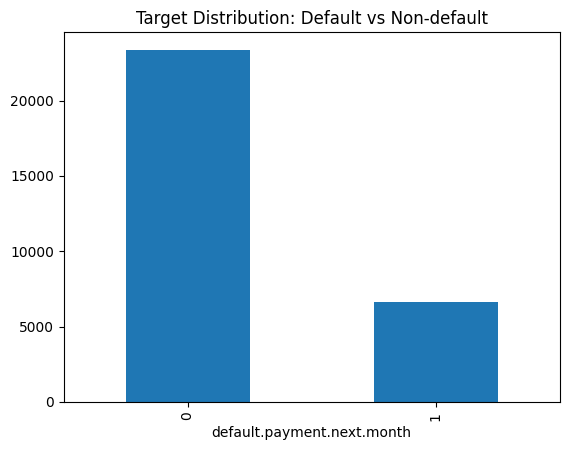

In [7]:
df['default.payment.next.month'].value_counts().plot(
    kind='bar', title="Target Distribution: Default vs Non-default"
)
plt.show()

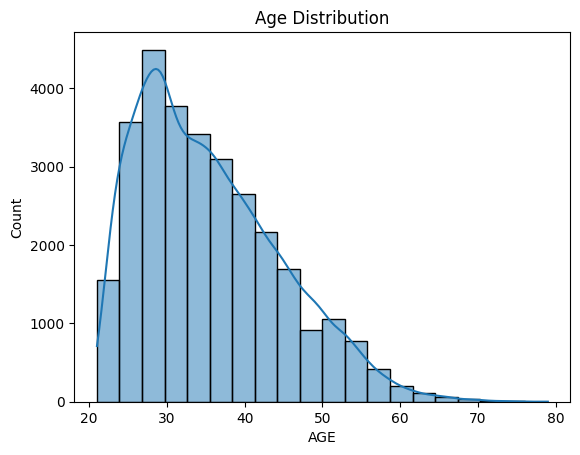

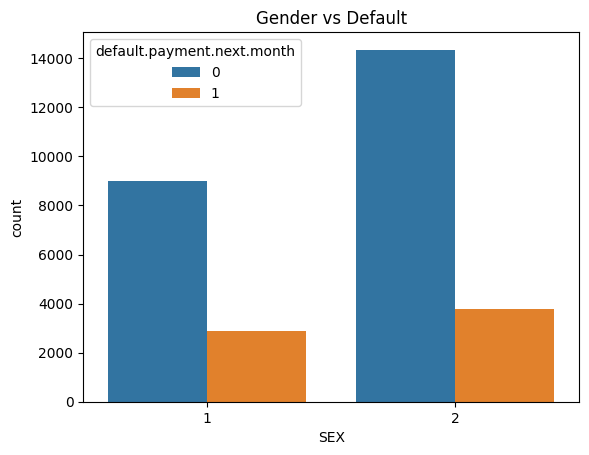

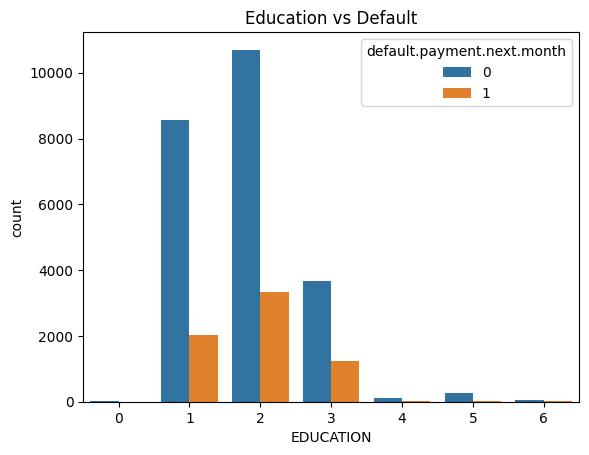

In [8]:
# AGE distribution
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# SEX vs Default
sns.countplot(x='SEX', hue='default.payment.next.month', data=df)
plt.title("Gender vs Default")
plt.show()

# EDUCATION vs Default
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df)
plt.title("Education vs Default")
plt.show()

1. **Data Preprocessing**  
   - Removed target from features (`X`), kept it in `y`.  
   - Train-test split (80/20).  
   - Feature scaling the dataset

In [9]:
target = 'default.payment.next.month'
print(df[target].value_counts(normalize=True))

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [10]:
X = df.drop(columns=[target])
y = df[target]

In [12]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
21753  21754    80000.0    2          2         2   24      0      0      0   
251      252    30000.0    1          2         2   28      0      0      0   
22941  22942   180000.0    2          5         1   44      0      0     -1   
618      619    60000.0    1          1         2   25      0      0      0   
17090  17091   130000.0    2          2         2   25      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29802  29803    50000.0    1          2         2   32      0      0      0   
5390    5391   200000.0    1          1         2   37      2      2      2   
860      861    50000.0    1          1         2   26     -2     -2     -2   
15795  15796    70000.0    2          2         2   25      0      0      0   
23654  23655   160000.0    2          2         1   36     -2     -2     -2   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5 

In [14]:
print(y_train)

21753    0
251      0
22941    0
618      0
17090    0
        ..
29802    0
5390     1
860      0
15795    1
23654    1
Name: default.payment.next.month, Length: 24000, dtype: int64


In [15]:
print(X_test)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
2308    2309    30000.0    1          2         2   25      0      0      0   
22404  22405   150000.0    2          1         2   26      0      0      0   
23397  23398    70000.0    2          3         1   32      0      0      0   
25058  25059   130000.0    1          3         2   49      0      0      0   
2664    2665    50000.0    2          2         2   36      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
2210    2211   360000.0    2          1         2   27      1     -2     -1   
14144  14145   500000.0    2          1         2   28      2      0      0   
23108  23109    60000.0    2          1         1   28      0      0      0   
25703  25704    20000.0    2          1         2   29      1     -1     -1   
29171  29172   510000.0    2          3         1   61      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5 

In [16]:
print(y_test)

2308     0
22404    0
23397    0
25058    0
2664     1
        ..
2210     0
14144    1
23108    0
25703    0
29171    0
Name: default.payment.next.month, Length: 6000, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[ 0.7768437  -0.67235902  0.80815856 ... -0.22465419 -0.21600791
  -0.24524018]
 [-1.70028095 -1.05776818 -1.23738094 ... -0.24078483 -0.30852284
  -0.29553162]
 [ 0.9137065   0.0984593   0.80815856 ...  0.12267581  0.35348711
  -0.28510675]
 ...
 [-1.63012149 -0.90360452 -1.23738094 ... -0.29935805 -0.30852284
  -0.29553162]
 [ 0.09045598 -0.74944086  0.80815856 ... -0.22575819 -0.30852284
  -0.22679617]
 [ 0.99584723 -0.05570437  0.80815856 ... -0.19815824  0.60062042
  -0.20961231]]


In [19]:
print(y_train)

21753    0
251      0
22941    0
618      0
17090    0
        ..
29802    0
5390     1
860      0
15795    1
23654    1
Name: default.payment.next.month, Length: 24000, dtype: int64


In [20]:
print(X_test)

[[-1.46330554 -1.05776818 -1.23738094 ... -0.20735823 -0.21248658
  -0.18097254]
 [ 0.85184175 -0.1327862   0.80815856 ... -0.13700903 -0.13764232
  -0.14265253]
 [ 0.9662397  -0.74944086  0.80815856 ... -0.14982767 -0.14846241
  -0.14923967]
 ...
 [ 0.93294564 -0.82652269  0.80815856 ... -0.14602501 -0.20608416
  -0.20961231]
 [ 1.23190101 -1.13485002  0.80815856 ... -0.26255812 -0.30852284
  -0.29553162]
 [ 1.63142981  2.64215975  0.80815856 ...  0.09979852  2.89268582
   0.10542516]]


In [21]:
print(y_train)

21753    0
251      0
22941    0
618      0
17090    0
        ..
29802    0
5390     1
860      0
15795    1
23654    1
Name: default.payment.next.month, Length: 24000, dtype: int64


In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, solver='liblinear')

In [23]:
y_pred = log_reg.predict(X_test)   # default threshold = 0.5
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay

def evaluate_thresholds(thresholds, y_test, y_prob):
    results = []

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)

        results.append({
            "Threshold": t,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision (Default=1)": precision_score(y_test, y_pred),
            "Recall (Default=1)": recall_score(y_test, y_pred),
            "F1 (Default=1)": f1_score(y_test, y_pred)
        })

    return pd.DataFrame(results)

# Compare thresholds
thresholds = [0.3, 0.4, 0.5]
comparison_df = evaluate_thresholds(thresholds, y_test, y_prob)
print(comparison_df)


   Threshold  Accuracy  Precision (Default=1)  Recall (Default=1)  \
0        0.3  0.364667               0.243376            0.902513   
1        0.4  0.508000               0.282453            0.810358   
2        0.5  0.690667               0.377978            0.640518   

   F1 (Default=1)  
0        0.383371  
1        0.418898  
2        0.475410  


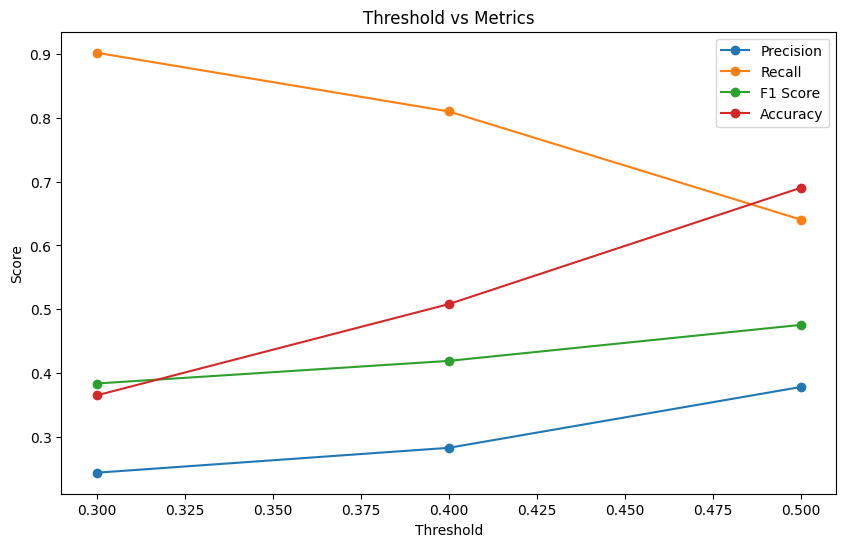

In [25]:
plt.figure(figsize=(10,6))
plt.plot(comparison_df["Threshold"], comparison_df["Precision (Default=1)"], marker='o', label="Precision")
plt.plot(comparison_df["Threshold"], comparison_df["Recall (Default=1)"], marker='o', label="Recall")
plt.plot(comparison_df["Threshold"], comparison_df["F1 (Default=1)"], marker='o', label="F1 Score")
plt.plot(comparison_df["Threshold"], comparison_df["Accuracy"], marker='o', label="Accuracy")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Metrics")
plt.legend()
plt.show()

      Feature  Coefficient  AbsCoefficient
6       PAY_0     0.571710        0.571710
12  BILL_AMT1    -0.329866        0.329866
19   PAY_AMT2    -0.227892        0.227892
18   PAY_AMT1    -0.167239        0.167239
7       PAY_2     0.120227        0.120227
14  BILL_AMT3     0.111761        0.111761
13  BILL_AMT2     0.108060        0.108060
1   LIMIT_BAL    -0.106806        0.106806
5         AGE     0.083532        0.083532
4    MARRIAGE    -0.072496        0.072496


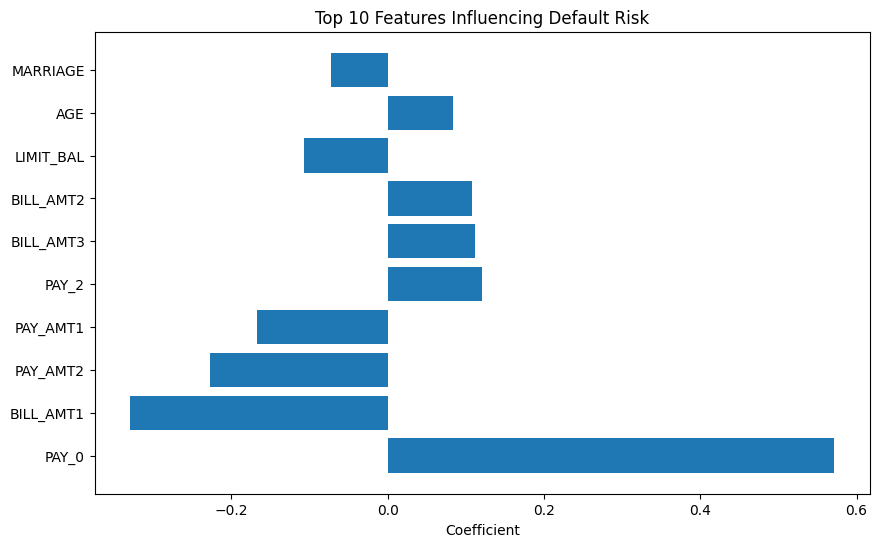

In [26]:
# Get feature names & coefficients
feature_names = X.columns
coefficients = log_reg.coef_[0]

# Sort by importance
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "AbsCoefficient": np.abs(coefficients)
}).sort_values(by="AbsCoefficient", ascending=False)

print(coef_df.head(10))

# Plot top 10 important features
plt.figure(figsize=(10,6))
plt.barh(coef_df["Feature"].head(10), coef_df["Coefficient"].head(10))
plt.xlabel("Coefficient")
plt.title("Top 10 Features Influencing Default Risk")
plt.show()


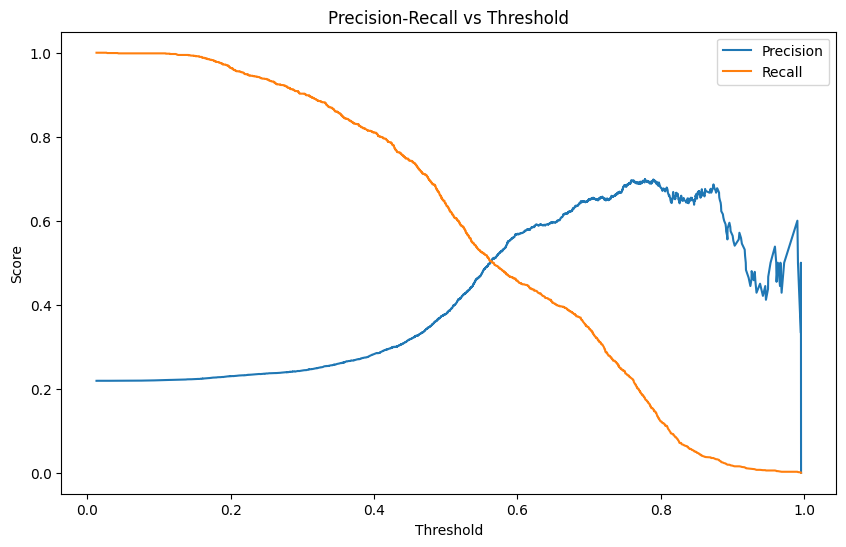

In [27]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()